# 试错

In [ ]:
import healpy as hp
from astropy.coordinates import SkyCoord


# Set the resolution parameter
nside = 128

# Set the coordinates of the desired sky position
ra = 74.0563449685417
dec = -34.155241212932374

# turn icrs to gal
cencoor = SkyCoord(ra=ra,dec=dec,unit='deg',frame='icrs')
galc = cencoor.transform_to('galactic')
gall, galb = galc.l.degree, galc.b.degree


# Set the radius in degrees
radius = 300 / 3600

# Get the list of pixels within the radius
ipix_list = hp.query_disc(nside, hp.pixelfunc.ang2vec(ra,dec, lonlat=True), radius)

# Print the list of pixels
len(ipix_list), ipix_list

In [18]:
gall,galb

(236.60261950183622, -37.650599873164595)

In [ ]:
select.to_csv('selection20230413.csv')
select = Table.from_pandas(select)
select.write('selection20230413.fits',format='fits')

True

In [ ]:
from astropy.table import Table
import astropy.units as u
import pandas
import os


xx = list()
root = '/media/hyz/travaller/CSSTsim/CSSTsim.20211214.pSDSSpPS1'

for i in ipix_list:
    f = f'triout_128_{i}.fits'
    t = Table.read(os.path.join(root,f))
    t = t.to_pandas()
    t = t[['gall','galb']]
    t = t[0::1000]
    _coor = SkyCoord(l=t['gall']*u.degree,b=t['galb']*u.degree,unit='deg',frame='galactic')
    _coor = _coor.transform_to('icrs')
    _ra, _dec = _coor.ra.degree, _coor.dec.degree 
    
    t['ra'] = _ra
    t['dec'] = _dec
    xx.append(t)
xx

# 测试healpix编码方式

In [ ]:
import healpy as hp
import numpy as np
from astropy.coordinates import SkyCoord

nside = 128

# pixel数量
npix = hp.nside2npix(nside)
print(npix)
# 空间分辨率
print(hp.nside2resol(nside,arcmin=True)/60)

# 绘图
m = np.arange(npix)
ra = 74.0563449685417
dec = -34.155241212932374
# turn icrs to gal
cencoor = SkyCoord(ra=ra,dec=dec,unit='deg',frame='icrs')
galc = cencoor.transform_to('galactic')
gall, galb = galc.l.degree, galc.b.degree
radius = 300/3600
ipix_disc = hp.query_disc(nside=nside,vec=hp.ang2vec(gall,galb, lonlat=True),radius=np.radians(radius))
m[ipix_disc] = m.max()
hp.mollview(m,title='Mollview image RING')

In [68]:
hp.ang2pix(nside,ra,dec,lonlat=True),hp.ang2pix(nside,gall,galb,lonlat=True)

(153449, 158800)

空间信息：\
ra = 74.0563449685417\
dec = -34.155241212932374\
l = 236.60261950183622\
b = -37.650599873164595

In [69]:
def readfits(id):
    f = f'triout_128_{id}.fits'
    t = Table.read(os.path.join(root,f))
    t = t.to_pandas()
    t = t[['gall','galb']]
    t = t[0::1000]
    _coor = SkyCoord(l=t['gall']*u.degree,b=t['galb']*u.degree,unit='deg',frame='galactic')
    _coor = _coor.transform_to('icrs')
    _ra, _dec = _coor.ra.degree, _coor.dec.degree 
    

    t['ra'] = _ra
    t['dec'] = _dec
    return t

readfits(153449), readfits(158800)

(            gall       galb         ra        dec
 0     169.869008 -35.460957  50.560581  13.322262
 1000  169.901326 -35.907233  50.274547  12.972591
 2000  169.662618 -35.752437  50.232387  13.216991
 3000  169.754713 -35.815583  50.246426  13.120130,
             gall       galb        ra        dec
 0     117.014559 -36.848945  7.602828  25.781095
 1000  116.702739 -37.100399  7.357142  25.504997
 2000  116.857894 -37.007772  7.482773  25.610196
 3000  117.035843 -36.799048  7.616016  25.832467
 4000  116.763570 -36.686451  7.361826  25.921773
 5000  116.991214 -36.865123  7.584028  25.763095)

In [100]:
hp.ang2pix(nside,160,-35,lonlat=True), readfits(154595)

(154595,
             gall       galb         ra        dec
 0     144.849532 -33.288270  33.191110  26.098712
 1000  144.881584 -33.104958  33.294539  26.259046
 2000  144.816087 -33.297882  33.158229  26.100114
 3000  144.721090 -33.243444  33.098351  26.180005
 4000  144.977761 -33.153373  33.357837  26.184168
 5000  144.863160 -33.076375  33.290373  26.291315)

不是普通编码

ra = 74.0563449685417\
dec = -34.155241212932374\
l = 236.60261950183622\
b = -37.650599873164595

In [110]:
for i in range(10):
    i+=0
    ii = int('15%02d00'%i)
    print(hp.pix2ang(nside,ii,nest=True,lonlat=True))

(125.13698630136986, -63.07261938698224)
(110.71428571428571, -66.81675324303833)
(96.04477611940298, -65.32234324182821)
(117.73972602739727, -63.07261938698224)
(110.34246575342466, -63.07261938698224)
(117.41379310344827, -57.78012842970898)
(138.6, -62.32040082727502)
(128.33333333333334, -60.05627904951214)
(145.58823529411765, -58.5402491350105)
(146.8181818181818, -53.18725897079298)


> **结论：NESTED而不是默认的RING..**

# 解码

ra = 74.0563449685417\
dec = -34.155241212932374

In [1]:
import healpy as hp
from astropy.coordinates import SkyCoord
import numpy as np
from astropy.table import Table
import os
import astropy.units as u


# Set the resolution parameter
nside = 128

# Set the coordinates of the desired sky position
ra = 121.1743
dec = -21.5733


# root path
root = '/media/hyz/travaller/CSSTsim/CSSTsim.20211214.pSDSSpPS1'

# turn icrs to gal
cencoor = SkyCoord(ra=ra,dec=dec,unit='deg',frame='icrs')
galc = cencoor.transform_to('galactic')
gall, galb = galc.l.degree, galc.b.degree

# or set the l,b directly. NOTE: need to # when use ra,dec
gall, galb = 0, 0

# Set the radius in degrees
radius = 2

# Get the list of pixels within the radius
ipix_list = hp.query_disc(nside, hp.pixelfunc.ang2vec(gall,galb,lonlat=True), np.radians(radius), nest=True)

# 如果范围太小，可能只有一个pix，换用单pix函数
if len(ipix_list) == 0:
    ipix_list = [hp.ang2pix(nside,gall,galb,nest=True,lonlat=True)]
ipix_list

array([69617, 69618, 69619, 69620, 69621, 69622, 69623, 69624, 69625,
       69626, 69627, 69628, 69629, 69630, 69631, 72352, 72353, 72354,
       72355, 72358, 72360, 72361, 72362, 72363, 72364, 72365, 72366,
       72367, 75088, 75089, 75090, 75091, 75092, 75093, 75094, 75095,
       75097, 75100, 75101, 75102, 75103, 77824, 77825, 77826, 77827,
       77828, 77829, 77830, 77831, 77832, 77833, 77834, 77835, 77836,
       77837, 77838])

In [2]:
# 检验
def readfits(id):
    f = f'triout_128_{id}.fits'
    t = Table.read(os.path.join(root,f))
    t = t.to_pandas()
    t = t[['gall','galb']]
    t = t[0::1000]
    _coor = SkyCoord(l=t['gall']*u.degree,b=t['galb']*u.degree,unit='deg',frame='galactic')
    _coor = _coor.transform_to('icrs')
    _ra, _dec = _coor.ra.degree, _coor.dec.degree 
    

    t['ra'] = _ra
    t['dec'] = _dec
    return t

readfits(ipix_list[0])

,gall,galb,ra,dec
0,0.360046,-1.839154,268.425581,-29.572135
1000,0.145020,-1.745429,268.207245,-29.709847
2000,0.361208,-2.019619,268.605349,-29.662388
3000,0.221190,-1.608304,268.115886,-29.574588
4000,0.410340,-1.752272,268.368754,-29.484783
...,...,...,...,...
10406000,0.144099,-1.904417,268.364523,-29.791290
10407000,0.526451,-1.792171,268.475749,-29.404914
10408000,0.386968,-1.581771,268.186417,-29.418394
10409000,0.394773,-1.879451,268.485736,-29.562595


In [11]:
for i in ipix_list:
    with open('./root.txt','a') as _r:
        _r.write(str(i)+',')

In [16]:
import pandas as pd

def simulation_stractor(ipix_list,ra,dec,distance):
    target = pd.DataFrame()
    columns = ['M_H', 'logTe', 'logg', 'uSmag', 'gSmag', 'rSmag', 'iSmag', 'zSmag', 'PMracos', 'PMdec', 'parallax', 'vrad', 'ra', 'dec']
    for id in ipix_list:
        f = f'triout_128_{id}.fits'
        t = Table.read(os.path.join(root,f))
        t = t.to_pandas()
        _coor = SkyCoord(l=t['gall']*u.degree,b=t['galb']*u.degree,unit='deg',frame='galactic')
        _coor = _coor.transform_to('icrs')
        _ra, _dec = _coor.ra.degree, _coor.dec.degree
        t['ra'] = _ra
        t['dec'] = _dec
        # t['parallax'] = 10**(0.2*t['mu0']+1) * u.pc
        # t['parallax'] = 2*u.au/t['parallax'].to(u.au)
        t = t[(t['ra']-ra)**2+(t['dec']-dec)**2<=distance**2]
        # target = pd.concat([target,t])
        target = pd.concat([target,t[columns]])
    return target

selection = simulation_stractor(ipix_list,ra,dec,radius)

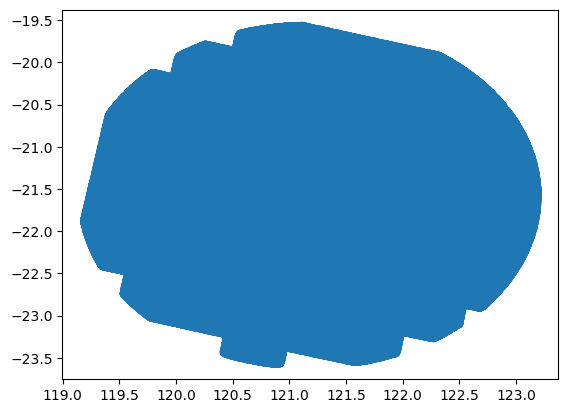

In [17]:
import matplotlib.pyplot as plt

selection.to_csv('selection_M31_20230419.csv')
plt.figure(figsize=(30,30))
# plt.xlim(121,121.5)
# plt.ylim(-21.3,-21.8)
plt.scatter(selection['ra'],selection['dec'],s=0.1)


# 尝试与Gaia匹配

## 提取gaia星表

In [16]:
import healpy as hp
import pandas as pd
import os



nside = 256
# ra = 74.0563449685417
# dec = -34.155241212932374
ra = 67.5
dec = -40.2

target_pix = hp.ang2pix(nside,ra,dec,nest=True,lonlat=True)
target_pix

554006

In [17]:
for i in os.listdir('/media/hyz/dwarfcave/data/gaiaDR3/ms'):
    if i.endswith('.csv'):
        if int(i.split('-')[1].split('.csv')[0]) >= target_pix and int(i.split('-')[0].split('_')[1]) <= target_pix:
            target_file = i
            break
target_file

'GaiaSource_553778-556045.csv'

In [18]:
gaiatb = pd.read_csv('/media/hyz/dwarfcave/data/gaiaDR3/ms/%s'%target_file,comment='#')
selection_g = gaiatb[(gaiatb['ra']-ra)**2+(gaiatb['dec']-dec)**2<=(1/12)**2]
selection_g.to_csv('./selection20230413_gaia.csv')

## 匹配

In [47]:
from scipy import spatial
import pandas as pd

selection = pd.read_csv('./selection20230413.csv')
selection_g = pd.read_csv('./selection20230413_gaia.csv')
tree_gaia = spatial.KDTree(selection[['ra','dec']])             # base = selection
_distance,_idx = tree_gaia.query(selection_g[['ra','dec']])     # fine each nearest star for gaia
len(selection),len(selection_g)

(405, 106)

In [58]:
_sidx = _distance < 1/1000  # restrict distance
_sidx

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [68]:
match = selection.loc[_idx,:][_sidx]
match_g = selection_g[_sidx]
np.vstack((match['gmag'],match_g['phot_g_mean_mag'])).T

array([[23.986294, 18.049307],
       [25.7178  , 19.90966 ],
       [24.524267, 20.514624],
       [27.105356, 16.318445],
       [23.927017, 20.339725],
       [26.383827, 18.154234],
       [24.065016, 17.430544]])

怪事！
> 位置匹配里居然没有星等匹配的！

In [ ]:
match_all = selection.loc[_idx,:]
match_g_all = selection_g
# mag_match_table = pd.DataFrame()
# mag_match_table['mag_sim'] = match_all['gmag']
# mag_match_table['mag_gaia'] = match_g_all['phot_g_mean_mag']
# mag_match_table['diverse'] = mag_match_table['mag_sim'] - mag_match_table['mag_gaia']
# mag_match_table.describe()
mag_match = np.vstack([match_all['gmag'],match_g_all['phot_g_mean_mag']])
mag_match = np.vstack([mag_match,(mag_match[0,:]-mag_match[1,:])]).T
mag_match

In [94]:
mag_match[:,2].min()

-1.912510000000001

In [ ]:
# loc_match_table = pd.DataFrame()
# loc_match_table['ra_sim'] = match_all['ra']
# loc_match_table['dec_sim'] = match_all['dec']
# loc_match_table['ra_gaia'] = match_g_all['ra']
# loc_match_table['dec_gaia'] = match_g_all['dec']
# loc_match_table['diverse'] = ((loc_match_table['ra_sim']-loc_match_table['ra_gaia'])**2+(loc_match_table['dec_sim']-loc_match_table['dec_gaia'] )**2)**0.5
# loc_match_table
loc_match = np.vstack([match_all['ra'],match_all['dec'],match_g_all['ra'],match_g_all['dec']])
loc_match = np.vstack([loc_match,((loc_match[0,:]-loc_match[2,:])**2+(loc_match[1,:]-loc_match[3,:])**2)**0.5]).T
loc_match

In [97]:
loc_match[:,4].min()*3600

0.2823235565089653

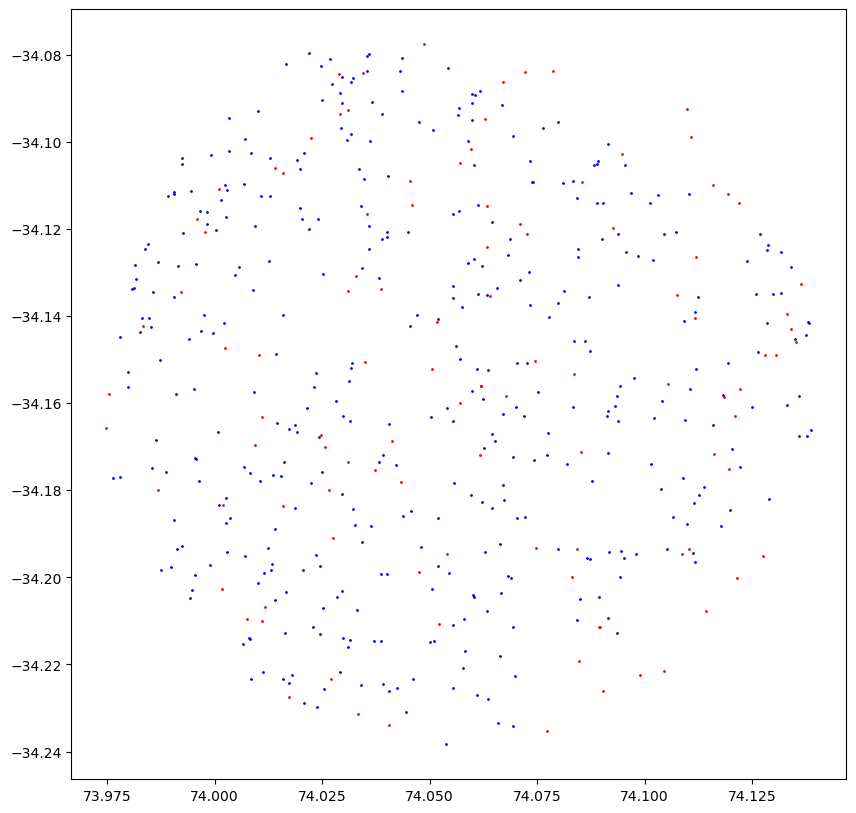

In [98]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(selection['ra'],selection['dec'],c='b',s=1)
ax.scatter(selection_g['ra'],selection_g['dec'],c='r',s=1)

结论：这星表没加gaia星...

# 给仿真星表添加gaia数据

策略：把仿真星表按星等排序，在gaia范围内的替换为gaia数据

In [1]:
import pandas as pd

cat_sim = pd.read_csv('selection20230413.csv')
gaia = pd.read_csv('selection20230413_gaia.csv')
cat_sim = cat_sim.sort_values('gmag')
gaia_gmax = gaia['phot_g_mean_mag'].max()
cat_sim = cat_sim.loc[cat_sim['gmag']>=gaia_gmax,:]
gaia_gmax, len(cat_sim)

(21.16048, 355)

In [26]:
cat_sim.columns,gaia.columns

(Index(['Unnamed: 0', 'Gc', 'logAge', 'M_H', 'm_ini', 'mu0', 'Av', 'mratio',
        'Mass', 'logL', 'logTe', 'logg', 'label', 'McoreTP', 'C_O', 'period0',
        'period1', 'pmode', 'Mloss', 'tau1m', 'X', 'Y', 'Xc', 'Xn', 'Xo',
        'Cexcess', 'Z', 'mbolmag', 'NUVmag', 'umag', 'gmag', 'rmag', 'imag',
        'zmag', 'ymag', 'uSmag', 'gSmag', 'rSmag', 'iSmag', 'zSmag', 'gP1mag',
        'rP1mag', 'iP1mag', 'zP1mag', 'yP1mag', 'wP1mag', 'velU', 'velV',
        'velW', 'Vrad', 'PMracos', 'PMdec', 'gall', 'galb', 'ra', 'dec'],
       dtype='object'),
 Index(['Unnamed: 0', 'solution_id', 'designation', 'source_id', 'random_index',
        'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error',
        ...
        'azero_gspphot', 'azero_gspphot_lower', 'azero_gspphot_upper',
        'ag_gspphot', 'ag_gspphot_lower', 'ag_gspphot_upper',
        'ebpminrp_gspphot', 'ebpminrp_gspphot_lower', 'ebpminrp_gspphot_upper',
        'libname_gspphot'],
       dtype='object', length=153))

In [8]:
gaia['gmag_gaia'] = gaia['phot_g_mean_mag']
gaia['rmag_gaia'] = gaia['phot_rp_mean_mag']
gaia['bmag_gaia'] = gaia['phot_bp_mean_mag']
gaia['pmra_gaia'] = gaia['pmra']
gaia['pmdec_gaia'] = gaia['pmdec']
gaia['gall'] = gaia['l']
gaia['galb'] = gaia['b']


In [9]:
cc = pd.concat([cat_sim,gaia[['gmag_gaia','rmag_gaia','bmag_gaia','pmra_gaia','pmdec_gaia','gall','galb','ra','dec','ra_error','dec_error','pmra_error','pmdec_error','parallax']]])
cc

,Unnamed: 0,Gc,logAge,M_H,m_ini,mu0,Av,mratio,Mass,logL,...,gmag_gaia,rmag_gaia,bmag_gaia,pmra_gaia,pmdec_gaia,ra_error,dec_error,pmra_error,pmdec_error,parallax
56,580.0,1.0,9.75,0.044971,0.327839,8.50,0.055783,0.000000,0.327549,-1.984579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,658.0,1.0,9.83,-0.206641,0.387265,9.70,0.062208,0.000000,0.386572,-1.745048,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,1362.0,2.0,10.05,-0.676669,0.263180,9.35,0.071356,0.000000,0.261684,-1.999949,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326,4351.0,3.0,10.11,-1.420952,0.591002,14.40,0.067088,0.000000,0.590218,-0.673079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55.0,1.0,9.37,-0.144334,0.209076,7.75,0.067660,0.705899,0.208232,-2.359977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.574404,16.038055,16.949669,4.701102,-9.410773,0.030590,0.034826,0.040884,0.050530,0.494671
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.949114,18.829140,20.843027,5.787172,-2.625475,0.261102,0.273449,0.332048,0.374498,1.075909
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.050783,20.603537,20.635060,NaN,NaN,2.517515,2.663985,NaN,NaN,NaN
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.527407,16.048080,16.837818,-2.133200,-1.203370,0.031074,0.034423,0.040180,0.046070,0.266087


In [12]:
cc.to_csv('selection20230413_concat_p.csv')

# 将仿真星表较亮的星前列增加gaia数据内容

In [1]:
import pandas as pd
import numpy as np

cat_sim = pd.read_csv('selection20230413.csv')
gaia = pd.read_csv('selection20230413_gaia.csv')
cat_sim = cat_sim.sort_values('gmag')
gaia = gaia.sort_values('phot_g_mean_mag')
cat_sim.index = np.arange(len(cat_sim))
gaia.index = np.arange(len(gaia))
cat_sim['gmag'], gaia['phot_g_mean_mag']

(0      10.096264
 1      13.559216
 2      14.205234
 3      14.591928
 4      14.954418
          ...    
 400    27.431395
 401    27.433918
 402    27.460197
 403    27.473290
 404    27.480175
 Name: gmag, Length: 405, dtype: float64,
 0      13.951618
 1      14.013914
 2      14.140081
 3      14.227643
 4      14.327298
          ...    
 101    21.046453
 102    21.050783
 103    21.082000
 104    21.117980
 105    21.160480
 Name: phot_g_mean_mag, Length: 106, dtype: float64)

In [2]:
cat_sim['gmag_gaia'] = gaia['phot_g_mean_mag']
cat_sim['rmag_gaia'] = gaia['phot_rp_mean_mag']
cat_sim['bmag_gaia'] = gaia['phot_bp_mean_mag']
cat_sim['gall_gaia'] = gaia['l']
cat_sim['galb_gaia'] = gaia['b']
cat_sim['ra_gaia'] = gaia['ra']
cat_sim['ra_error_gaia'] = gaia['ra_error']
cat_sim['dec_gaia'] = gaia['dec']
cat_sim['dec_error_gaia'] = gaia['dec_error']
cat_sim['pmra_gaia'] = gaia['pmra']
cat_sim['pmra_error_gaia'] = gaia['pmra_error']
cat_sim['pmdec_gaia'] = gaia['pmdec']
cat_sim['pmdec_error_gaia'] = gaia['pmdec_error']
cat_sim['parallax_gaia'] = gaia['parallax']
cat_sim['parallax_error_gaia'] = gaia['parallax_error']
cat_sim['radial_velocity_gaia'] = gaia['radial_velocity']
cat_sim['radial_velocity_error_gaia'] = gaia['radial_velocity_error']

In [30]:
cat_sim.to_csv('selection20230413_concat_pp.csv')

## 给剩余的恒星添加Gaia相关的仿真数据

In [8]:
cat_sim.columns

Index(['Unnamed: 0', 'Gc', 'logAge', 'M_H', 'm_ini', 'mu0', 'Av', 'mratio',
       'Mass', 'logL', 'logTe', 'logg', 'label', 'McoreTP', 'C_O', 'period0',
       'period1', 'pmode', 'Mloss', 'tau1m', 'X', 'Y', 'Xc', 'Xn', 'Xo',
       'Cexcess', 'Z', 'mbolmag', 'NUVmag', 'umag', 'gmag', 'rmag', 'imag',
       'zmag', 'ymag', 'uSmag', 'gSmag', 'rSmag', 'iSmag', 'zSmag', 'gP1mag',
       'rP1mag', 'iP1mag', 'zP1mag', 'yP1mag', 'wP1mag', 'velU', 'velV',
       'velW', 'Vrad', 'PMracos', 'PMdec', 'gall', 'galb', 'ra', 'dec',
       'gmag_gaia', 'rmag_gaia', 'bmag_gaia', 'gall_gaia', 'galb_gaia',
       'ra_gaia', 'ra_error_gaia', 'dec_gaia', 'dec_error_gaia', 'pmra_gaia',
       'pmra_error_gaia', 'pmdec_gaia', 'pmdec_error_gaia', 'parallax_gaia',
       'parallax_error_gaia', 'radial_velocity_gaia',
       'radial_velocity_error_gaia'],
      dtype='object')

In [74]:
import astropy.units as u

num_gaia = len(gaia)
num_sim = len(cat_sim)
cat_sim.loc[num_gaia:,'gmag_gaia'] = cat_sim.loc[num_gaia:, 'gSmag']
cat_sim.loc[num_gaia:,'rmag_gaia'] = cat_sim.loc[num_gaia:, 'rSmag']
cat_sim.loc[num_gaia:,'bmag_gaia'] = cat_sim.loc[num_gaia:, 'uSmag']
cat_sim.loc[num_gaia:,'gall_gaia'] = cat_sim.loc[num_gaia:, 'gall']
cat_sim.loc[num_gaia:,'galb_gaia'] = cat_sim.loc[num_gaia:, 'galb']
cat_sim.loc[num_gaia:,'ra_gaia'] = cat_sim.loc[num_gaia:, 'ra']
# sim.loc[num_gaia:,'ra_error_gaia'] = sim.loc[num_gaia:, '']
cat_sim.loc[num_gaia:,'dec_gaia'] = cat_sim.loc[num_gaia:, 'dec']
# sim.loc[num_gaia:,'dec_error_gaia'] = sim.loc[num_gaia:, ]
cat_sim.loc[num_gaia:,'pmra_gaia'] = cat_sim.loc[num_gaia:, 'PMracos'] / np.cos(cat_sim.loc[num_gaia:, 'dec'])
# sim.loc[num_gaia:,'pmra_error_gaia'] = sim.loc[num_gaia:, '']
cat_sim.loc[num_gaia:,'pmdec_gaia'] = cat_sim.loc[num_gaia:, 'PMdec']
# sim.loc[num_gaia:,'pmdec_error_gaia'] = sim.loc[num_gaia:, '']
cat_sim.loc[num_gaia:,'parallax_gaia'] = u.AU.to(u.pc)/np.power(10, 0.2*cat_sim.loc[num_gaia:, 'mu0']+1)/(1/3600*0.01*u.degree.to(u.rad))
# sim.loc[num_gaia:,'parallax_error_gaia'] = sim.loc[num_gaia:,]
cat_sim.loc[num_gaia:,'radial_velocity_gaia'] = cat_sim.loc[num_gaia:, 'Vrad']
# sim.loc[num_gaia:,'radial_velocity_error_gaia'] = sim.loc[num_gaia:, ]

ssim_list = ['ra_error_gaia','dec_error_gaia','pmra_error_gaia','pmdec_error_gaia','parallax_error_gaia','radial_velocity_error_gaia']
for isim in ssim_list:
    _hist,_edge = np.histogram(cat_sim.loc[:num_gaia,isim],bins=100,range=[cat_sim.loc[:num_gaia,isim].min(),cat_sim.loc[:num_gaia,isim].max()])
    sample = np.empty(1)
    for i in range(len(_hist)):
        sample = np.concatenate([sample, np.random.rand(int(num_sim*_hist[i]/num_gaia)) * (_edge[i+1]-_edge[i]) + _edge[i]], axis=0)
    if len(sample)<num_sim-num_gaia:
        sample = np.concatenate([sample,np.ones(num_sim-num_gaia-len(sample))*np.nan])
    np.random.shuffle(sample)
    print(len(cat_sim.loc[num_gaia:,isim]),len(sample))
    cat_sim.loc[num_gaia:,isim] = sample[:num_sim-num_gaia]

cat_sim.loc[:num_gaia,'if_gaia_true'] = int(1)
cat_sim.loc[num_gaia:,'if_gaia_true'] = int(0)
cat_sim = cat_sim.fillna(np.random.rand())

cat_sim.loc[::20,'gmag_gaia':]

299 397
299 399
299 392
299 388
299 385
299 404


,gmag_gaia,rmag_gaia,bmag_gaia,gall_gaia,galb_gaia,ra_gaia,ra_error_gaia,dec_gaia,dec_error_gaia,pmra_gaia,pmra_error_gaia,pmdec_gaia,pmdec_error_gaia,parallax_gaia,parallax_error_gaia,radial_velocity_gaia,radial_velocity_error_gaia,if_gaia_true
0,13.951618,13.346763,14.390314,236.616530,-37.597194,74.122214,0.009512,-34.156869,0.011692,-1.537565,0.012749,4.383325,0.015770,0.410067,0.012682,36.962204,3.229694,1.0
20,16.860233,16.050734,17.583284,236.594279,-37.602858,74.111786,0.037469,-34.140487,0.040048,0.538770,0.050951,20.563193,0.053993,1.236299,0.046845,0.647563,0.647563,1.0
40,18.500624,17.419687,19.717093,236.638786,-37.602512,74.119567,0.094256,-34.175157,0.102240,1.549052,0.125781,3.720063,0.142017,1.226390,0.118311,0.647563,0.647563,1.0
60,19.744750,18.535954,20.994652,236.607830,-37.591075,74.128055,0.234592,-34.149021,0.254058,19.955388,0.318765,6.066618,0.337183,2.203365,0.294412,0.647563,0.647563,1.0
80,20.355140,19.169024,21.380182,236.655271,-37.665233,74.047599,0.390691,-34.198824,0.466357,4.090745,0.530286,-3.223296,0.693800,1.365263,0.476461,0.647563,0.647563,1.0
100,21.006735,19.897750,21.179039,236.565094,-37.614861,74.092667,1.637958,-34.119795,2.471916,0.647563,0.647563,0.647563,0.647563,0.647563,0.647563,0.647563,0.647563,1.0
120,23.835487,22.305954,27.017159,236.631267,-37.655059,74.055761,0.016190,-34.178351,0.184443,6.353631,0.312298,2.756697,0.333033,0.093325,0.250515,0.763806,0.697847,0.0
140,24.222446,22.806246,27.144695,236.609454,-37.653447,74.054083,0.317541,-34.161062,0.341205,-0.404275,0.108212,-8.212915,0.655575,0.040738,0.656894,-4.975894,0.693404,0.0
160,24.641193,23.026096,28.598083,236.537856,-37.686601,74.002814,1.689513,-34.110960,0.185960,19.975181,0.160077,-4.815015,0.030896,0.234423,0.641191,41.345753,0.653275,0.0
180,24.692710,23.745018,26.569206,236.527068,-37.684622,74.003388,0.113302,-34.102210,0.350082,-0.856311,0.141075,-4.798131,0.035920,0.008128,0.110503,119.131996,0.677210,0.0


In [73]:
cat_sim.to_csv('selection20230413_concat_ppp.csv')

# 合并星表一体化

## Trilegal提取

**Name RA DEC**\
XDF 53.16041667 -27.78333333\
JWST-NEP-TDS-FIELD 260.6995667 65.82265\
RXCJ1206.2-0848 181.552         -8.806\
RCS_J2319.8+0038        349.97208       0.63694\
MACSJ1423.8+2404        215.949         24.078\
MACSJ0744.9+3927        116.219         39.457

In [64]:
import healpy as hp
from astropy.coordinates import SkyCoord
import numpy as np
from astropy.table import Table
import os
import astropy.units as u

# Set the resolution parameter
nside = 128

# Set the coordinates of the desired sky position
ra = 116.219
dec = 39.457

# root path
root = '/media/hyz/travaller/CSSTsim/CSSTsim.20211214.pSDSSpPS1'
save_path = './selection_MACSJ0744.9+3927_20230517.csv'

# turn icrs to gal
cencoor = SkyCoord(ra=ra,dec=dec,unit='deg',frame='icrs')
galc = cencoor.transform_to('galactic')
gall, galb = galc.l.degree, galc.b.degree

# or set the l,b directly. NOTE: need to # when use ra,dec
# gall, galb = 0, 0

# Set the radius in degrees
radius = 2

# Get the list of pixels within the radius
ipix_list = hp.query_disc(nside, hp.pixelfunc.ang2vec(gall,galb,lonlat=True), np.radians(radius), nest=True)

# 如果范围太小，可能只有一个pix，换用单pix函数
if len(ipix_list) == 0:
    ipix_list = [hp.ang2pix(nside,gall,galb,nest=True,lonlat=True)]
ipix_list

array([113771, 113774, 113775, 113786, 113787, 113815, 113821, 113823,
       113845, 113856, 113857, 113858, 113859, 113860, 113861, 113862,
       113863, 113864, 113865, 113866, 113867, 113868, 113869, 113870,
       113871, 113872, 113873, 113874, 113875, 113876, 113878, 113880,
       113881, 113882, 113883, 113884, 113885, 113886, 113887, 113888,
       113889, 113890, 113891, 113892, 113893, 113894, 113895, 113897,
       113900, 113901, 113904, 113905, 113906, 113907, 113908, 113910,
       113912])

In [65]:
# 检验
def readfits(id):
    f = f'triout_128_{id}.fits'
    t = Table.read(os.path.join(root,f))
    t = t.to_pandas()
    t = t[['gall','galb']]
    t = t[0::1000]
    _coor = SkyCoord(l=t['gall']*u.degree,b=t['galb']*u.degree,unit='deg',frame='galactic')
    _coor = _coor.transform_to('icrs')
    _ra, _dec = _coor.ra.degree, _coor.dec.degree 
    

    t['ra'] = _ra
    t['dec'] = _dec
    return t

readfits(ipix_list[0])

,gall,galb,ra,dec
0,180.648094,25.094040,114.440127,38.599492
1000,180.680808,24.766371,114.047407,38.481628
2000,180.817115,24.745848,114.065693,38.356978
3000,180.509833,24.811895,114.048973,38.643382
4000,180.703539,24.902811,114.222275,38.499162
5000,180.840831,24.937965,114.308873,38.388990
6000,180.593380,25.020515,114.332368,38.627294


In [66]:
Table.read(os.path.join(root,f'triout_128_113932.fits')).columns

<TableColumns names=('Gc','logAge','M_H','m_ini','mu0','Av','mratio','Mass','logL','logTe','logg','label','McoreTP','C_O','period0','period1','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo','Cexcess','Z','mbolmag','NUVmag','umag','gmag','rmag','imag','zmag','ymag','uSmag','gSmag','rSmag','iSmag','zSmag','gP1mag','rP1mag','iP1mag','zP1mag','yP1mag','wP1mag','velU','velV','velW','Vrad','PMracos','PMdec','gall','galb')>

In [67]:
import pandas as pd

def simulation_stractor(ipix_list,ra,dec,distance):
    target = pd.DataFrame()
    columns = ['M_H', 'logTe', 'logg', 'mu0',
               'NUVmag', 'umag', 'gmag', 'rmag', 'imag', 'zmag', 'ymag', 
               'uSmag', 'gSmag', 'rSmag', 'iSmag', 'zSmag', 
               'PMracos', 'PMdec', 'Vrad', 'ra', 'dec', 'gall', 'galb']
    for id in ipix_list:
        f = f'triout_128_{id}.fits'
        t = Table.read(os.path.join(root,f))
        t = t.to_pandas()
        _coor = SkyCoord(l=t['gall']*u.degree,b=t['galb']*u.degree,unit='deg',frame='galactic')
        _coor = _coor.transform_to('icrs')
        _ra, _dec = _coor.ra.degree, _coor.dec.degree
        t['ra'] = _ra
        t['dec'] = _dec
        # t['parallax'] = 10**(0.2*t['mu0']+1) * u.pc
        # t['parallax'] = 2*u.au/t['parallax'].to(u.au)
        t = t[(t['ra']-ra)**2+(t['dec']-dec)**2<=distance**2]
        # target = pd.concat([target,t])
        target = pd.concat([target,t[columns]])
    return target

selection = simulation_stractor(ipix_list,ra,dec,radius)

264755

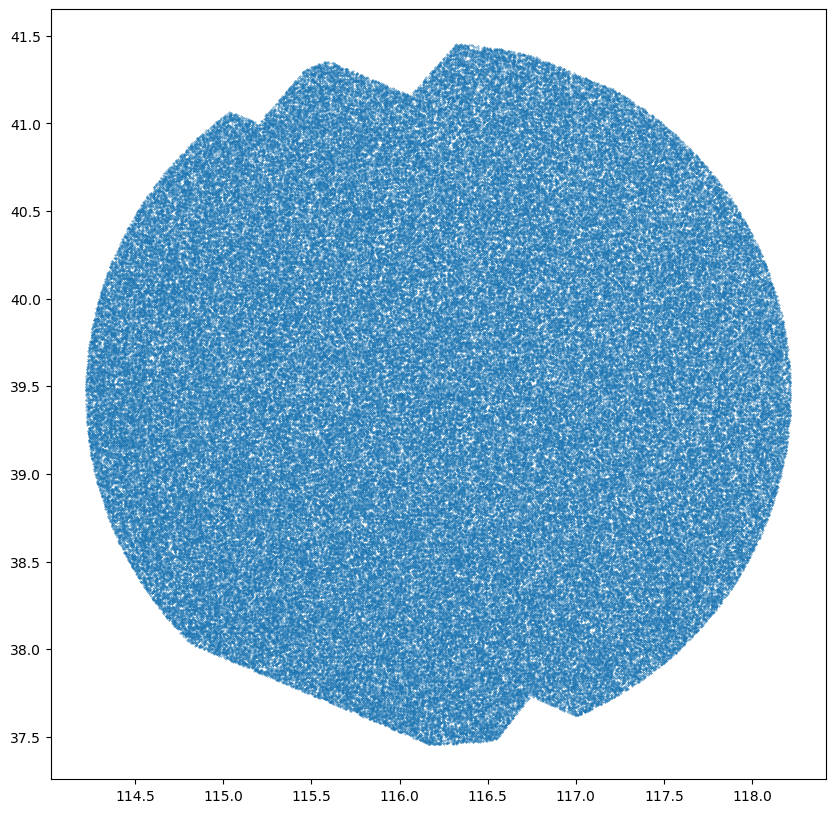

In [68]:
import matplotlib.pyplot as plt

selection.to_csv(save_path)
plt.figure(figsize=(10,10))
# plt.xlim(121,121.5)
# plt.ylim(-21.3,-21.8)
plt.scatter(selection['ra'],selection['dec'],s=0.1)
len(selection)

## Gaia提取

238

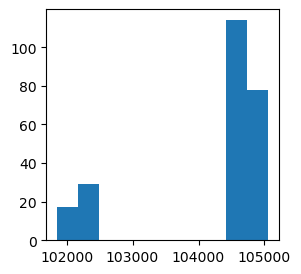

In [69]:
import healpy as hp
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


nside = 256
ra = 116.219
dec = 39.457
radius = 2

save_path = './selection_MACSJ0744.9+3927_20230517.csv'

target_pix = hp.query_disc(nside, hp.pixelfunc.ang2vec(ra,dec,lonlat=True), np.radians(radius), nest=True)

if len(target_pix) == 0:
    target_pix = [hp.ang2pix(nside,ra,dec,nest=True,lonlat=True)]
plt.figure(figsize=(3,3))
plt.hist(target_pix)
len(target_pix)

In [70]:
target_file = []
for pix in target_pix:
    for i in os.listdir('/media/hyz/dwarfcave/data/gaiaDR3/ms'):
        if i.endswith('.csv') and i not in target_file:
            if int(i.split('-')[1].split('.csv')[0]) >= pix and int(i.split('-')[0].split('_')[1]) <= pix:
                target_file.append(i)
                break
target_file

['GaiaSource_101393-102417.csv', 'GaiaSource_104417-106070.csv']

In [71]:
def gaia_stractor(ipix_list,ra,dec,distance):
    target = pd.DataFrame()
    columns = ['phot_g_mean_mag', 'phot_rp_mean_mag', 'phot_bp_mean_mag',
               'l', 'b', 'ra', 'ra_error', 'dec', 'dec_error',
               'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 
               'parallax', 'parallax_error', 'radial_velocity', 'radial_velocity_error']
    for id in ipix_list:
        t = pd.read_csv('/media/hyz/dwarfcave/data/gaiaDR3/ms/%s'%id,comment='#',usecols=columns)
        t = t[(t['ra']-ra)**2+(t['dec']-dec)**2<=distance**2]
        # target = pd.concat([target,t])
        target = pd.concat([target,t[columns]])
    return target

selection_g = gaia_stractor(target_file,ra,dec,radius)

72744

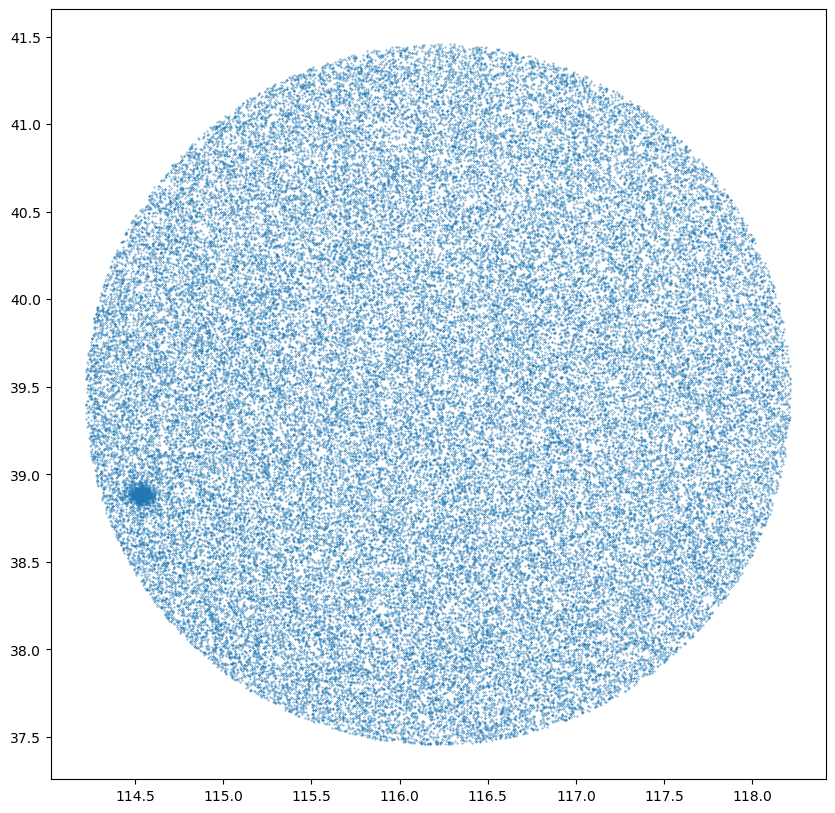

In [72]:
selection_g.to_csv(save_path[:-4]+'_gaia'+save_path[-4:])
plt.figure(figsize=(10,10))
plt.scatter(selection_g['ra'],selection_g['dec'],s=0.1)
len(selection_g)

## 合并与仿真

In [73]:
import pandas as pd
import numpy as np
import os


save_path = './selection_MACSJ0744.9+3927_20230517.csv'
cat_sim = pd.read_csv(save_path)
gaia = pd.read_csv(save_path[:-4]+'_gaia'+save_path[-4:])
cat_sim = cat_sim.sort_values('gmag')
gaia = gaia.sort_values('phot_g_mean_mag')
cat_sim.index = np.arange(len(cat_sim))
gaia.index = np.arange(len(gaia))
len(cat_sim), len(gaia)

(264755, 72744)

In [74]:
cat_sim['gmag_gaia'] = gaia['phot_g_mean_mag']
cat_sim['rmag_gaia'] = gaia['phot_rp_mean_mag']
cat_sim['bmag_gaia'] = gaia['phot_bp_mean_mag']
cat_sim['gall_gaia'] = gaia['l']
cat_sim['galb_gaia'] = gaia['b']
cat_sim['ra_gaia'] = gaia['ra']
cat_sim['ra_error_gaia'] = gaia['ra_error']
cat_sim['dec_gaia'] = gaia['dec']
cat_sim['dec_error_gaia'] = gaia['dec_error']
cat_sim['pmra_gaia'] = gaia['pmra']
cat_sim['pmra_error_gaia'] = gaia['pmra_error']
cat_sim['pmdec_gaia'] = gaia['pmdec']
cat_sim['pmdec_error_gaia'] = gaia['pmdec_error']
cat_sim['parallax_gaia'] = gaia['parallax']
cat_sim['parallax_error_gaia'] = gaia['parallax_error']
cat_sim['radial_velocity_gaia'] = gaia['radial_velocity']
cat_sim['radial_velocity_error_gaia'] = gaia['radial_velocity_error']

In [75]:
import astropy.units as u

num_gaia = len(gaia)
num_sim = len(cat_sim)
cat_sim.loc[num_gaia:,'gmag_gaia'] = cat_sim.loc[num_gaia:, 'gSmag']
cat_sim.loc[num_gaia:,'rmag_gaia'] = cat_sim.loc[num_gaia:, 'rSmag']
cat_sim.loc[num_gaia:,'bmag_gaia'] = cat_sim.loc[num_gaia:, 'uSmag']
cat_sim.loc[num_gaia:,'gall_gaia'] = cat_sim.loc[num_gaia:, 'gall']
cat_sim.loc[num_gaia:,'galb_gaia'] = cat_sim.loc[num_gaia:, 'galb']
cat_sim.loc[num_gaia:,'ra_gaia'] = cat_sim.loc[num_gaia:, 'ra']
# sim.loc[num_gaia:,'ra_error_gaia'] = sim.loc[num_gaia:, '']
cat_sim.loc[num_gaia:,'dec_gaia'] = cat_sim.loc[num_gaia:, 'dec']
# sim.loc[num_gaia:,'dec_error_gaia'] = sim.loc[num_gaia:, ]
cat_sim.loc[num_gaia:,'pmra_gaia'] = cat_sim.loc[num_gaia:, 'PMracos'] / np.cos(cat_sim.loc[num_gaia:, 'dec'])
# sim.loc[num_gaia:,'pmra_error_gaia'] = sim.loc[num_gaia:, '']
cat_sim.loc[num_gaia:,'pmdec_gaia'] = cat_sim.loc[num_gaia:, 'PMdec']
# sim.loc[num_gaia:,'pmdec_error_gaia'] = sim.loc[num_gaia:, '']
cat_sim.loc[num_gaia:,'parallax_gaia'] = u.AU.to(u.pc)/np.power(10, 0.2*cat_sim.loc[num_gaia:, 'mu0']+1)/(1/3600*0.01*u.degree.to(u.rad))
# sim.loc[num_gaia:,'parallax_error_gaia'] = sim.loc[num_gaia:,]
cat_sim.loc[num_gaia:,'radial_velocity_gaia'] = cat_sim.loc[num_gaia:, 'Vrad']
# sim.loc[num_gaia:,'radial_velocity_error_gaia'] = sim.loc[num_gaia:, ]

ssim_list = ['ra_error_gaia','dec_error_gaia','pmra_error_gaia','pmdec_error_gaia','parallax_error_gaia','radial_velocity_error_gaia']
for isim in ssim_list:
    _hist,_edge = np.histogram(cat_sim.loc[:num_gaia,isim],bins=100,range=[cat_sim.loc[:num_gaia,isim].min(),cat_sim.loc[:num_gaia,isim].max()])
    sample = np.empty(1)
    for i in range(len(_hist)):
        sample = np.concatenate([sample, np.random.rand(int(num_sim*_hist[i]/num_gaia)) * (_edge[i+1]-_edge[i]) + _edge[i]], axis=0)
    if len(sample)<num_sim-num_gaia:
        sample = np.concatenate([sample,np.ones(num_sim-num_gaia-len(sample))*np.nan])
    np.random.shuffle(sample)
    print(len(cat_sim.loc[num_gaia:,isim]),len(sample))
    cat_sim.loc[num_gaia:,isim] = sample[:num_sim-num_gaia]

cat_sim.loc[:num_gaia,'if_gaia_true'] = int(1)
cat_sim.loc[num_gaia:,'if_gaia_true'] = int(0)


192011 264708
192011 264705
192011 233481
192011 233475
192011 233482
192011 192011


In [83]:
def insert_na(t):
    for col in t.columns:
        data = t[col]
        num_na = data.isna().sum()
        idx_na = data[data.isna()].index
        if num_na == 0:
            continue
        if 'mag' in col:
            insert_data = t[['gmag_gaia','rmag_gaia','bmag_gaia']].mean(axis=1)[idx_na]
            insert_data_ = pd.Series(np.random.rand(insert_data.isna().sum())+t['gmag_gaia'].max())
            insert_data_.index = insert_data[insert_data.isna()].index
            insert_data = insert_data.fillna(insert_data_)
            insert_data = np.random.rand(num_na) * 2 + insert_data
        elif 'error' in col:
            insert_data = np.random.rand(num_na) * data.std() + data.max()
        else:
            insert_data = np.random.randn(num_na) + data.mean()
        insert_data = pd.Series(insert_data)
        insert_data.index = idx_na
        t[col] = data.fillna(insert_data)
    return t

insert_na(cat_sim)[::20,'gmag_gaia':]

,Unnamed: 0,M_H,logTe,logg,mu0,NUVmag,umag,gmag,rmag,imag,...,dec_error_gaia,pmra_gaia,pmra_error_gaia,pmdec_gaia,pmdec_error_gaia,parallax_gaia,parallax_error_gaia,radial_velocity_gaia,radial_velocity_error_gaia,if_gaia_true
0,7,-0.039668,3.700176,2.584444,4.400001,8.402931,6.587591,4.706951,4.034467,3.795889,...,0.089404,28.160812,0.134692,13.083806,0.093919,8.245193,0.142314,-37.306760,0.308344,1.0
1,4,0.130614,3.971709,4.173084,4.350000,6.804304,6.018516,5.177836,5.334320,5.538611,...,0.042835,-39.996687,0.063490,-10.302648,0.042641,3.240004,0.078096,45.818798,0.148141,1.0
2,901,-0.060693,3.657082,2.382802,4.600000,10.468868,8.407965,6.098668,5.232268,4.901738,...,0.074669,-12.862728,0.109946,-49.021705,0.075037,3.978268,0.128256,27.653860,0.863722,1.0
3,62,0.087653,3.603223,1.379086,6.700000,12.505299,9.736742,6.486072,5.295341,4.749719,...,0.044456,-15.721485,0.069736,-19.192385,0.049293,1.756749,0.068922,18.415668,2.157749,1.0
4,43,-0.081670,3.850154,3.700388,5.400001,8.966187,7.871899,6.874337,6.752990,6.786761,...,0.023243,-1.772011,0.034629,-22.220518,0.023867,2.296185,0.036451,30.223833,0.490731,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264750,2767,-2.191739,3.697678,4.817067,20.000000,30.378109,28.859630,27.499954,26.821232,26.491907,...,0.179426,-0.197672,0.593794,-0.540349,0.110916,0.001000,0.065250,105.513720,35.141474,0.0
264751,4298,-1.721425,3.613115,5.036925,16.750000,31.871292,29.700690,27.499968,26.404064,25.879038,...,0.199496,-2.986842,0.722562,-4.747521,0.415713,0.004467,0.076650,-6.007408,36.038215,0.0
264752,2894,-2.191739,3.648342,5.004164,17.800001,31.130210,29.267279,27.499980,26.633870,26.208569,...,0.558759,0.281775,0.308232,-2.328098,1.329549,0.002754,0.081583,90.127360,35.945812,0.0
264753,3097,-2.191739,3.613354,5.186084,16.450000,31.816322,29.688640,27.499987,26.400253,25.866463,...,0.355008,-2.926585,0.862931,-2.950086,0.116720,0.005129,0.198870,66.220840,35.152726,0.0


In [88]:
cat_sim[['gmag_gaia','rmag_gaia','bmag_gaia']][-20:]

,gmag_gaia,rmag_gaia,bmag_gaia
264735,27.613686,26.300460,29.991653
264736,27.609169,26.347908,29.928679
264737,27.599234,26.458600,29.724586
264738,27.713118,25.904238,31.717820
264739,27.688550,26.075989,31.334194
264740,27.578562,26.665680,29.351055
264741,27.638933,26.075802,30.439852
264742,27.639538,26.136465,30.463615
264743,27.619467,26.237630,30.119660
264744,27.640821,26.074986,30.456800


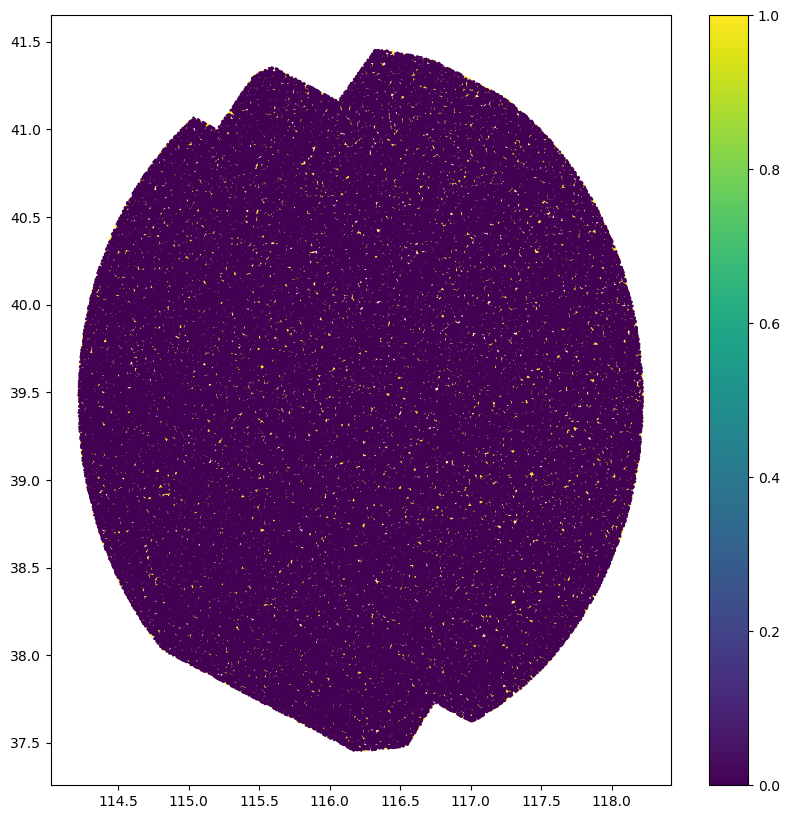

In [90]:
plt.figure(figsize=(10,10))
plt.scatter(cat_sim['ra'],cat_sim['dec'],s=1,c=cat_sim['if_gaia_true'])
plt.colorbar()

In [91]:
cat_sim.to_csv(save_path[:-4]+'_concat'+save_path[-4:])

## 检查

In [1]:
import pandas as pd

save_path = './selection_MACSJ0744.9+3927_20230517.csv'
cat_sim = pd.read_csv(save_path[:-4]+'_concat'+save_path[-4:])
cat_sim['gmag_gaia'].describe()

count    264755.000000
mean         23.898508
std           3.531648
min           0.708350
25%          20.828718
50%          25.235096
75%          26.540008
max          27.728680
Name: gmag_gaia, dtype: float64

# 银心仿真数据生成

In [ ]:
import pandas as pd
import numpy as np
import os
from astropy.coordinates import SkyCoord
from astropy.table import Table
import astropy.units as u
import healpy as hp


寻找银心附近的Gaia数据文件

In [25]:
radius = 2
nside = 256
cencoor = SkyCoord(l=0,b=0,unit='deg',frame='galactic')
icrsc = cencoor.transform_to('icrs')
ra, dec = icrsc.ra.degree, icrsc.dec.degree
print(ra,dec)
# Get the list of pixels within the radius
ipix_list = hp.query_disc(nside, hp.pixelfunc.ang2vec(ra,dec,lonlat=True), np.radians(radius), nest=True)

# 如果范围太小，可能只有一个pix，换用单pix函数
if len(ipix_list) == 0:
    ipix_list = [hp.ang2pix(nside,gall,galb,nest=True,lonlat=True)]
ipix_gaia_l,ipix_gaia_r = min(ipix_list), max(ipix_list)

# 从gaia星表里得到包含这些区域的文件
gaia_root = '/media/hyz/dwarfcave/data/gaiaDR3/ms/'
gaia_files = []
for gf in os.listdir(gaia_root):
    if gf.endswith('.csv'):
        left = int(gf.split('_')[1].split('-')[0])
        right = int(gf.split('-')[1].split('.c')[0])
        if left <= ipix_gaia_r and right >= ipix_gaia_l:
            gaia_files.append(gf)
len(gaia_files)

['GaiaSource_461404-461416.csv',
 'GaiaSource_461085-461111.csv',
 'GaiaSource_461112-461127.csv',
 'GaiaSource_461128-461139.csv',
 'GaiaSource_461140-461150.csv',
 'GaiaSource_461151-461161.csv',
 'GaiaSource_461162-461172.csv',
 'GaiaSource_461173-461183.csv',
 'GaiaSource_461184-461253.csv',
 'GaiaSource_461254-461275.csv',
 'GaiaSource_461276-461325.csv',
 'GaiaSource_461326-461348.csv',
 'GaiaSource_461349-461373.csv',
 'GaiaSource_461374-461389.csv',
 'GaiaSource_461390-461403.csv',
 'GaiaSource_461417-461429.csv',
 'GaiaSource_461430-461447.csv',
 'GaiaSource_461448-461462.csv',
 'GaiaSource_461463-461475.csv',
 'GaiaSource_461476-461487.csv',
 'GaiaSource_461488-461499.csv',
 'GaiaSource_461500-461512.csv',
 'GaiaSource_461513-461524.csv',
 'GaiaSource_461525-461537.csv',
 'GaiaSource_461538-461553.csv',
 'GaiaSource_461554-461567.csv',
 'GaiaSource_461568-461582.csv',
 'GaiaSource_461583-461601.csv',
 'GaiaSource_461602-461616.csv',
 'GaiaSource_461633-461658.csv',
 'GaiaSour

In [27]:
for i in gaia_files:
    with open('root.txt','a') as f:
        f.write(i+',')

添加Gaia数据

In [ ]:
def gaia_stractor(gaia_files,ra,dec,radius):
    selection = pd.DataFrame()
    columns = ['RA','Dec','app_sdss_g','teff','grav','feh','pmra','pmdec','RV','parallax']
    for file in gaia_files:
        path = os.path.join(gaia_root,file)
        cat = pd.read_csv(path,comment='#',usecols=['ra','dec','phot_g_mean_mag','mh_gspphot','logg_gspphot','teff_gspphot','pmra','pmdec','radial_velocity','parallax'])
        cat = cat[(cat['ra']-ra)**2+(cat['dec']-dec)**2<=radius**2]
        cat['RA'] = cat['ra']
        cat['Dec'] = cat['dec']
        cat['app_sdss_g'] = cat['phot_g_mean_mag']
        cat['teff'] = cat['teff_gspphot']
        cat['grav'] = cat['logg_gspphot']
        cat['feh'] = cat['mh_gspphot']
        cat['RV'] = cat['radial_velocity']
        selection = pd.concat([selection,cat[columns]])
    return selection

catgaia = gaia_stractor(gaia_files,ra,dec,radius)

In [ ]:
# Set the resolution parameter
nside = 128

# root path
root = '/home/haoyanzhen_shao/project/simulation_work/data_dir/catalog/CSST_trilegal/'

# Get the list of pixels within the radius
ipix_list = hp.query_disc(nside, hp.pixelfunc.ang2vec(gall,galb,lonlat=True), np.radians(radius), nest=True)

# 如果范围太小，可能只有一个pix，换用单pix函数
if len(ipix_list) == 0:
    ipix_list = [hp.ang2pix(nside,gall,galb,nest=True,lonlat=True)]
ipix_list

In [ ]:

def simulation_stractor(ipix_list,ra,dec,distance):
    target = pd.DataFrame()
    columns = ['RA','Dec','app_sdss_g','teff','grav','feh','pmra','pmdec','RV','parallax']
    for id in ipix_list:
        f = f'triout_128_{id}.fits'
        t = Table.read(os.path.join(root,f))
        t = t.to_pandas()
        _coor = SkyCoord(l=t['gall']*u.degree,b=t['galb']*u.degree,unit='deg',frame='galactic')
        _coor = _coor.transform_to('icrs')
        _ra, _dec = _coor.ra.degree, _coor.dec.degree
        t['RA'] = _ra
        t['Dec'] = _dec
        t['app_sdss_g'] = t['gSmag']
        t['teff'] = 10**t['logTe']
        t['grav'] = t['logg']
        t['feh'] = t['M_H']
        t['pmra'] = t['PMracos']/np.cos(t['Dec'])
        t['pmdec'] = t['PMdec']
        t['RV'] = t['vrad']
        t['parallax'] = 10**(0.2*t['mu0']+1) * u.pc
        t['parallax'] = 2*u.au/t['parallax'].to(u.au)
        t['parallax'] = t['parallax'].value
        t = t[(t['ra']-ra)**2+(t['dec']-dec)**2<=distance**2]
        target = pd.concat([target,t[columns]])
    return target


catsim = simulation_stractor(ipix_list,ra,dec,radius)

In [ ]:
catsim = catsim.loc[catsim['app_sdss_g']>=catgaia['app_sdss_g'].max(),:]
concat = pd.concat([catsim,catgaia])
concat = Table.from_pandas(concat)
concat.write('galactic_center_20230423.fits', format='fits')


# 优化合并星表

1. 提取对应天区的Gaia星表，包含天体测量、视向速度、物理三大气参数
2. 将Gaia星表的历元转到2000年
3. 引入星等转化系统
4. 将Gaia星表和Trilegal星表结合

In [1]:
# 参数设置

ra = 81.5625
dec = -31.38816646
# ra = 260
# dec = 0
radius = 1.1

save_path = './selection_merge20230609.csv'

[170991 171000 171001 171002 171003 171004 171006 176453 176455 176461
 176464 176465 176466 176467 176468 176470 176472 176473]
            gall       galb         ra        dec
0     235.081345 -31.829870  80.523575 -31.706717
1000  234.814950 -31.849304  80.435534 -31.492308
2000  234.616795 -31.701071  80.554247 -31.292105
3000  234.819558 -31.752362  80.546762 -31.471920
4000  234.635974 -31.603328  80.669746 -31.283254
5000  235.158674 -31.744957  80.639430 -31.749382
6000  235.020945 -31.794280  80.549150 -31.648172
74
['GaiaSource_329263-329984.csv', 'GaiaSource_329985-331030.csv', 'GaiaSource_548658-551055.csv']
23129


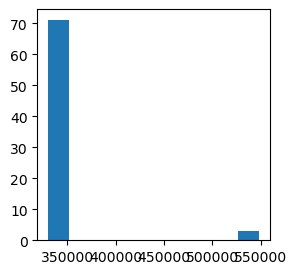

In [40]:
# 提取星表

from utils import *

sim_stractor(ra,dec,radius,save_path)
gaia_stractor(ra,dec,radius,save_path)


In [38]:
# 合并整体星表
cat_concat = cat_merge_padding(save_path, J2000=True)

595508 132090
595508 595508
595508 595508
595508 595508
595508 595508
595508 595508
595508 595508
len(sim_truncated),len(gaia),len(target) 497064 132090 629154


([<matplotlib.axis.XTick at 0x7f71a4653340>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

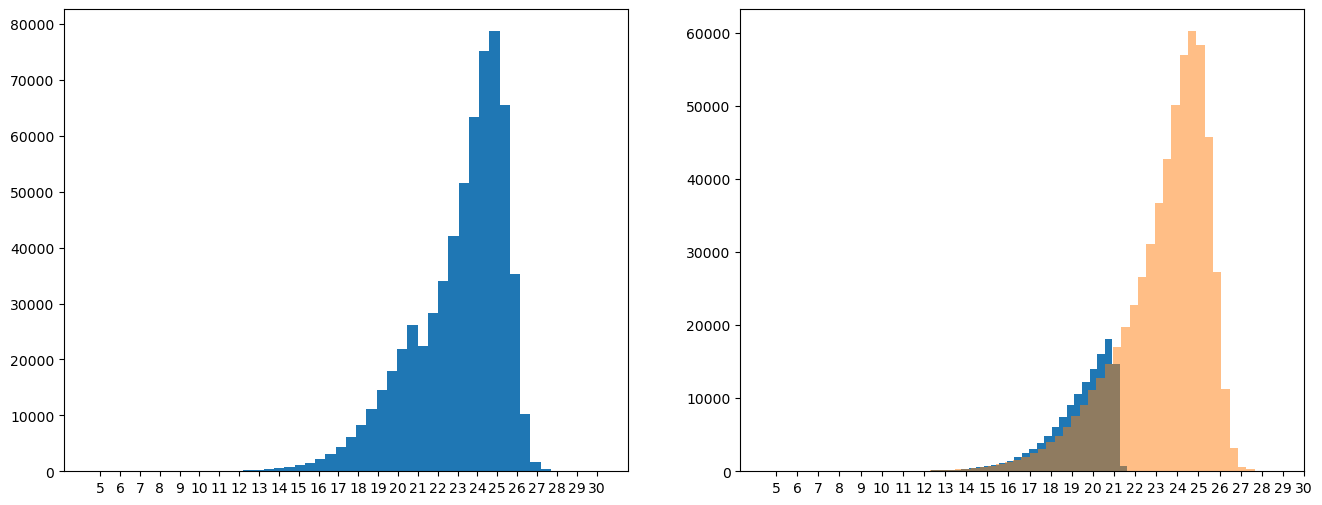

In [3]:
# 检查上一步生成的concat星表

# cat_concat = pd.read_csv(save_path[:-4]+'_concat'+save_path[-4:])
plt.figure(figsize=(16,6))
plt.subplot(121)

plt.hist(cat_concat['gmag_gaia'],bins=50,log=False)
plt.xticks(np.linspace(5,30,26))
# plt.yticks(np.linspace(0,70000,8))

plt.subplot(122)
cat_gaia = pd.read_csv(save_path[:-4]+'_gaia'+save_path[-4:])
cat_sim = pd.read_csv(save_path[:-4]+'_sim'+save_path[-4:])

gi_sdss = cat_sim['gSmag'] - cat_sim['iSmag']
cat_sim['g'] = -0.074189 - 0.51409*gi_sdss - 0.080607*gi_sdss**2 + 0.0016001*gi_sdss**3 + cat_sim['gSmag']  # Gaia-SDSS12 relationship
plt.hist(cat_gaia['phot_g_mean_mag'],bins=50)
plt.hist(cat_sim['g'],alpha=0.5,bins=50)
plt.xticks(np.linspace(5,30,26))
# plt.yticks(np.linspace(0,10000,8))
's'

In [41]:
# 合并仿真星表
# 读取时间转到2000年下的赤经赤纬，并进行星表合并
epoch_trans(save_path, 2016, 2000)
gaia_j2000 = pd.read_csv(save_path[:-4]+'_gaia_j2000'+save_path[-4:])
gaia_j2000['ra'] = gaia_j2000['ra_j2000']
gaia_j2000['dec'] = gaia_j2000['dec_j2000']
gaia_j2000.to_csv(save_path[:-4]+'_gaia_j2000'+save_path[-4:])

/home/hyz/anaconda3/envs/photo/lib/python3.10/site-packages/astropy/units/equivalencies.py:85: RuntimeWarning: divide by zero encountered in divide
  d = 1 / x
/home/hyz/anaconda3/envs/photo/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "pmsafe" yielded 3362 of "distance overridden (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [2]:
cat = cat_merge_forsim(save_path, J2000=True)

98306 23129


len(cat):  12865


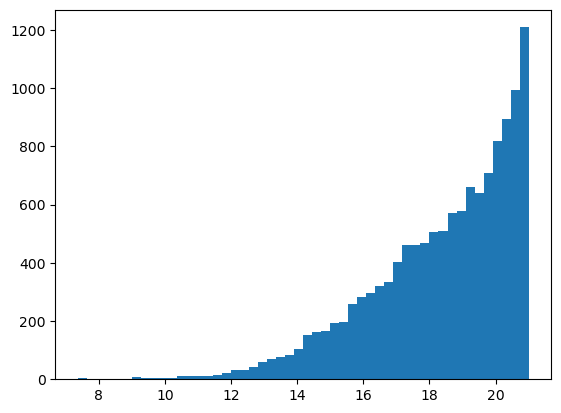

In [3]:
# 存为fits格式
import pandas as pd
from astropy.io import fits
from astropy.table import Table

cat = pd.read_csv(save_path[:-4]+'_merge_forsim'+save_path[-4:])
cat = cat.loc[:,cat.columns[1:]]  # 去掉第一行的行数
cat.dropna(subset=['RA','Dec','app_sdss_g'],inplace=True)  # 去掉必要参数是nan的行
# 挑选<21等的星
cat = cat[cat['app_sdss_g']<21.]
print('len(cat): ',len(cat))
plt.hist(cat['app_sdss_g'],bins=50)
cat = Table.from_pandas(cat)
cat.write(save_path[:-4]+'_merge_forsim.fits', format='fits', overwrite=True)

检查

's'

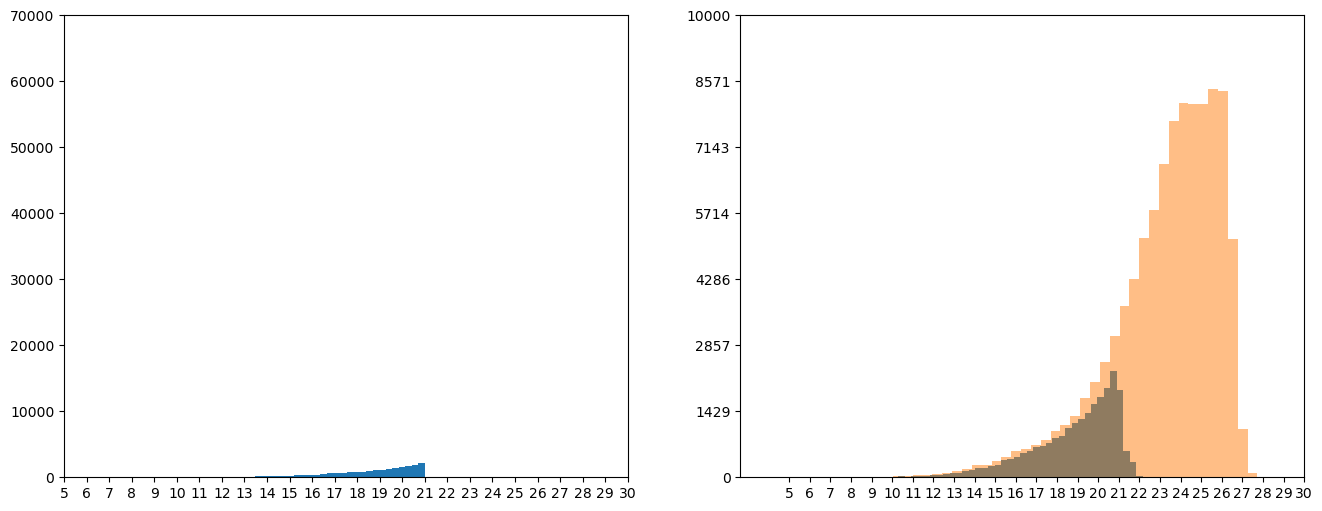

In [7]:
plt.figure(figsize=(16,6))
plt.subplot(121)

plt.hist(cat['g'],bins=50,log=False)
plt.xticks(np.linspace(5,30,26))
plt.yticks(np.linspace(0,70000,8))

plt.subplot(122)
cat_gaia = pd.read_csv(save_path[:-4]+'_gaia_j2000'+save_path[-4:])
cat_sim = pd.read_csv(save_path[:-4]+'_sim'+save_path[-4:])

gi_sdss = cat_sim['gSmag'] - cat_sim['iSmag']
cat_sim['g'] = -0.074189 - 0.51409*gi_sdss - 0.080607*gi_sdss**2 + 0.0016001*gi_sdss**3 + cat_sim['gSmag']  # Gaia-SDSS12 relationship
plt.hist(cat_gaia['phot_g_mean_mag'],bins=50)
plt.hist(cat_sim['g'],alpha=0.5,bins=50)
plt.xticks(np.linspace(5,30,26))
plt.yticks(np.linspace(0,10000,8))
's'

In [3]:
cat

,RA,Dec,g,teff,grav,feh,pmra,pmdec,parallax,rv
0,260.204485,-0.380033,21.332046,10274.483523,8.198109,0.066279,-15.581005,9.133438,0.478630,-37.762405
1,259.187321,0.240412,21.294369,98541.779354,6.681928,-2.001650,-2.603297,-0.842772,0.009120,-91.186810
2,260.552502,-0.777517,21.299336,96841.163803,6.819366,-1.981639,-3.327655,-7.095563,0.010965,-6.044127
3,259.947720,-0.479158,21.322640,93804.203463,6.759511,-0.350899,-3.344880,-1.072205,0.010000,-298.342700
4,259.720962,-0.352517,21.321996,98443.716260,6.691711,-1.701402,-3.053230,-2.547874,0.008913,-256.024300
...,...,...,...,...,...,...,...,...,...,...
629149,259.431736,0.743823,NaN,NaN,NaN,NaN,6.572681,5.865859,-0.713692,NaN
629150,259.352205,0.773029,NaN,NaN,NaN,NaN,6.779557,1.291522,2.047168,NaN
629151,259.636811,0.872037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
629152,259.320966,0.831804,NaN,NaN,NaN,NaN,3.646163,-18.723841,-1.181969,NaN
